In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

## Data Cleaning (Behaviors Dataframe)

In [3]:
# Ensure History & Impressions is stored as a list
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df['Impressions'] = behaviors_df['Impressions'].str.split(' ')

behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'])

behaviors_df.head()



Impression ID User ID                Time  \
0              1  U13740 2019-11-11 09:05:58   
1              2  U91836 2019-11-12 18:11:30   
2              3  U73700 2019-11-14 07:01:48   
3              4  U34670 2019-11-11 05:28:05   
4              5   U8125 2019-11-12 16:11:21   

                                             History  \
0  [N55189, N42782, N34694, N45794, N18445, N6330...   
1  [N31739, N6072, N63045, N23979, N35656, N43353...   
2  [N10732, N25792, N7563, N21087, N41087, N5445,...   
3  [N45729, N2203, N871, N53880, N41375, N43142, ...   
4                   [N10078, N56514, N14904, N33740]   

                                         Impressions  
0                               [N55689-1, N35729-0]  
1  [N20678-0, N39317-0, N58114-0, N20495-0, N4297...  
2  [N50014-0, N23877-0, N35389-0, N49712-0, N1684...  
3           [N35729-0, N33632-0, N49685-1, N27581-0]  
4  [N39985-0, N36050-0, N16096-0, N8400-1, N22407...

## Data Cleaning (News Dataframe)

In [4]:
news_column_names = ['News ID', 'Category', 'SubCategory', 'Title', 'Abstract','URL','Title Entities','Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t',names=news_column_names)
news_df.head()

News ID   Category      SubCategory  \
0  N55528  lifestyle  lifestyleroyals   
1  N19639     health       weightloss   
2  N61837       news        newsworld   
3  N53526     health           voices   
4  N38324     health          medical   

                                               Title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                            Abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good re...   

                                             URL  \
0  https://assets.msn.com/labs/mind/AAGH0ET.html   
1  https://assets.msn.com/labs/mind/AAB19MK.html   
2  https://assets.msn.com/labs/mind/AAJgNsz.html   
3  https://assets.msn.com/labs/mind/AACk2N6.html   
4  https://assets.msn.com/labs/mind/AAAKEkt.html   

                                      Title Entities  \
0  [{"Label": "Prince Philip, Duke of Edinburgh",...   
1  [{"Label": "Adipose tissue", "Type": "C", "Wik...   
2                                                 []   
3                                                 []   
4  [{"Label": "Skin tag", "Type": "C", "WikidataI...   

                                   Abstract Entities  
0                                                 []  
1  [{"Label": "Adipose tissue", "Type": "C", "Wik...  
2  [{"Label": "Ukraine", "Type": "G", "WikidataId...  
3  [{"Label": "National Basketball Association", ...  
4  [{"Label": "Skin tag", "Type": "C", "WikidataI...

## Merging Both Dataframes

In [42]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions',]
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df = behaviors_df.drop(columns=["Impression ID"])

behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df = behaviors_df.explode('History').rename(columns={'History': 'News_ID'})

# Load `news_df` with correct column names
news_column_names = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t', names=news_column_names)


In [6]:
merged_df = behaviors_df.merge(news_df, on='News_ID', how='left')
merged_df = merged_df.drop_duplicates(subset=["User ID",'News_ID'])

In [33]:
merged_df.head(5)

User ID                Time News_ID        Impressions Category  \
0  U13740 2019-11-11 09:05:58  N55189  N55689-1 N35729-0       tv   
1  U13740 2019-11-11 09:05:58  N42782  N55689-1 N35729-0   sports   
2  U13740 2019-11-11 09:05:58  N34694  N55689-1 N35729-0       tv   
3  U13740 2019-11-11 09:05:58  N45794  N55689-1 N35729-0     news   
4  U13740 2019-11-11 09:05:58  N18445  N55689-1 N35729-0   sports   

     SubCategory                                              Title  \
0         tvnews  'Wheel Of Fortune' Guest Delivers Hilarious, O...   
1   baseball_mlb  Three takeaways from Yankees' ALCS Game 5 vict...   
2         tvnews  Rosie O'Donnell: Barbara Walters Isn't 'Up to ...   
3      newscrime  Four flight attendants were arrested in Miami'...   
4  football_ncaa  Michigan sends breakup tweet to Notre Dame as ...   

                                            Abstract  \
0  We'd like to solve the puzzle, Pat: Blair Davi...   
1  The Yankees kept hope alive thanks to some imp...   
2  Rosie O'Donnell: Barbara Walters Isn't 'Up to ...   
3  Four American Airlines flight attendants were ...   
4  Parting is such sweet sorrow, say the Wolverines.   

                                             URL  \
0  https://assets.msn.com/labs/mind/AAIORni.html   
1  https://assets.msn.com/labs/mind/AAJ1mE9.html   
2  https://assets.msn.com/labs/mind/AAIZa64.html   
3  https://assets.msn.com/labs/mind/AAJcQKF.html   
4  https://assets.msn.com/labs/mind/AAJpMXE.html   

                                      Title Entities  \
0                                                 []   
1  [{"Label": "New York Yankees", "Type": "O", "W...   
2  [{"Label": "Rosie O'Donnell", "Type": "P", "Wi...   
3                                                 []   
4                                                 []   

                                   Abstract Entities  Hour  Click  \
0  [{"Label": "Pat Sajak", "Type": "P", "Wikidata...     9      1   
1  [{"Label": "New York Yankees", "Type": "O", "W...     9      1   
2  [{"Label": "Rosie O'Donnell", "Type": "P", "Wi...     9      1   
3  [{"Label": "Miami International Airport", "Typ...     9      1   
4                                                 []     9      1   

   Total_Impressions  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2

## No-History dataframe

In [7]:
Nan_df = merged_df[merged_df["News_ID"].isna()]
Nan_df


Nan_df1 = Nan_df.assign(Impressions=Nan_df['Impressions'].str.split()).explode('Impressions')
Nan_df1.head(5)


Nan_df1['News_ID'] = Nan_df1['Impressions'].str.split('-').str[0]
Nan_df1['Impressions'] = Nan_df1['Impressions'].str.split('-').str[1]


merged_null_df = Nan_df1.merge(news_df, on='News_ID', how='left')

merged_null_df = merged_null_df.loc[:, ~merged_null_df.columns.str.endswith('_x')]
merged_null_df.head(5)

User ID                    Time News_ID Impressions Category_y  \
0  U33207  11/11/2019 11:09:14 AM  N62212           0     travel   
1  U33207  11/11/2019 11:09:14 AM  N27521           0       news   
2  U33207  11/11/2019 11:09:14 AM  N28983           0         tv   
3  U33207  11/11/2019 11:09:14 AM  N12028           0    finance   
4  U33207  11/11/2019 11:09:14 AM  N25437           0     health   

  SubCategory_y                                            Title_y  \
0    travelnews  The world's first hybrid cruise ship is curren...   
1     newsworld             Bolivian Leader Evo Morales Steps Down   
2    tv-gallery            ICYMI: The week in TV news for Nov. 3-9   
3       markets  Frackers Prepare to Pull Back, Exacerbating a ...   
4    weightloss  Is it really easier for men to lose weight? Ex...   

                                          Abstract_y  \
0  The MS Roald Amundsen's maiden voyage is a pol...   
1  President Evo Morales of Bolivia, who came to ...   
2  DWTS judge frustrated with Sean Spicer's run, ...   
3  After pushing U.S. oil and natural-gas product...   
4  There are reasons men and women lose weight di...   

                                           URL_y  \
0  https://assets.msn.com/labs/mind/BBWvNny.html   
1  https://assets.msn.com/labs/mind/BBWyw2S.html   
2  https://assets.msn.com/labs/mind/BBWtoek.html   
3  https://assets.msn.com/labs/mind/BBWAqCG.html   
4  https://assets.msn.com/labs/mind/BBWtVz8.html   

                                    Title Entities_y  \
0                                                 []   
1  [{"Label": "Evo Morales", "Type": "P", "Wikida...   
2                                                 []   
3                                                 []   
4                                                 []   

                                 Abstract Entities_y  
0  [{"Label": "MS Roald Amundsen", "Type": "V", "...  
1  [{"Label": "Evo Morales", "Type": "P", "Wikida...  
2  [{"Label": "Donald Trump Jr.", "Type": "P", "W...  
3                                                 []  
4                                                 []

# **Data Exploration**

## Analyzing User Engagement with Content Categories

* Goal: See if users tend to engage more with specific categories (e.g., tv, health, news).
* How: Group by User ID and Category to count the frequency of interactions per category. This could help identify user preferences

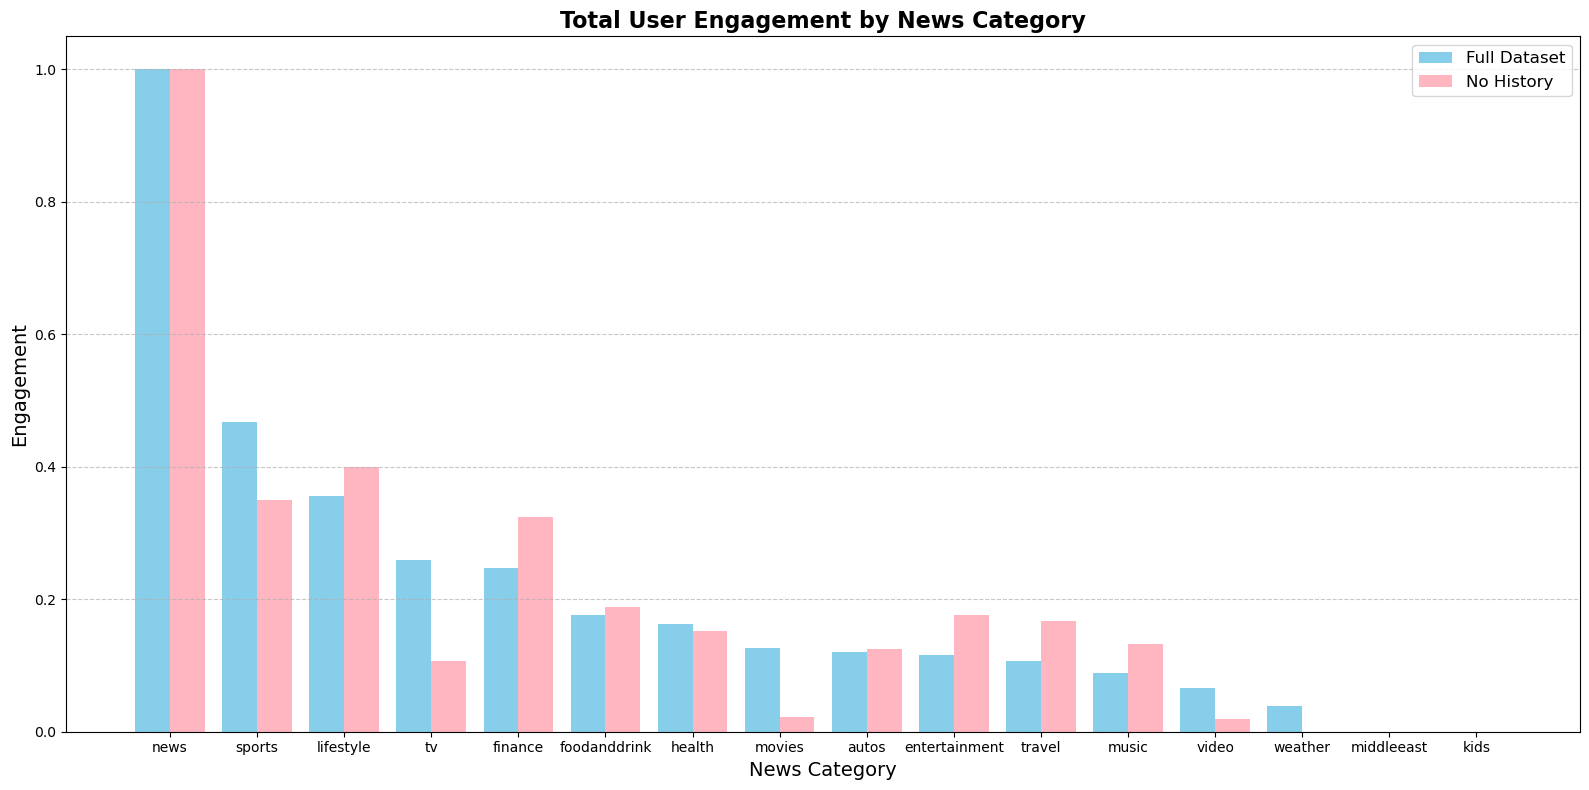

In [9]:
# Define a min-max scaler function for normalization
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# Using merged_df
category_engagement_df = merged_df.groupby(['User ID', 'Category']).size().unstack(fill_value=0)
category_totals_df = category_engagement_df.sum().sort_values(ascending=False)
category_totals_df_scaled = min_max_scale(category_totals_df)

# Using merged_null_df
category_engagement_null_df = merged_null_df.groupby(['User ID', 'Category_y']).size().unstack(fill_value=0)
category_totals_null_df = category_engagement_null_df.sum().sort_values(ascending=False)
category_totals_null_df_scaled = min_max_scale(category_totals_null_df)


combined_categories = category_totals_df_scaled.index.union(category_totals_null_df_scaled.index)
category_totals_df_scaled = category_totals_df_scaled.reindex(combined_categories, fill_value=0)
category_totals_null_df_scaled = category_totals_null_df_scaled.reindex(combined_categories, fill_value=0)

# Combine and sort by descending engagement
combined_data = pd.DataFrame({
    'Full Dataset': category_totals_df_scaled,
    'No History': category_totals_null_df_scaled
}).sort_values(by='Full Dataset', ascending=False)


x = np.arange(len(combined_data.index))  # X positions for the bars
category_totals_df_scaled_sorted = combined_data['Full Dataset']
category_totals_null_df_scaled_sorted = combined_data['No History']
sorted_categories = combined_data.index


plt.figure(figsize=(16, 8))

bar_width = 0.4

# Plot full dataset
plt.bar(x - bar_width/2, category_totals_df_scaled_sorted, width=bar_width, color='skyblue', label='Full Dataset')

# Plot no history dataset
plt.bar(x + bar_width/2, category_totals_null_df_scaled_sorted, width=bar_width, color='lightpink', label='No History')

plt.title('Total User Engagement by News Category', fontsize=16, weight='bold')
plt.xlabel('News Category', fontsize=14)
plt.ylabel('Engagement', fontsize=14)  # Simplified Y-axis label
plt.xticks(ticks=x, labels=sorted_categories, rotation=0, ha='center', fontsize=10)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The standardized category totals for merged_df and merged_null_df highlight similar patterns in user engagement with news categories, but there are notable differences in category preferences between the two datasets. For both, the “news” category dominates engagement, standardized at 1.000, indicating it receives the highest user interactions by a significant margin.

In merged_df, “sports” (0.467) and “lifestyle” (0.356) are the next most popular categories, while categories like “middleeast” (0.000029) and “kids” (0.000) receive minimal engagement. This suggests that users in merged_df primarily focus on general news and high-interest topics like sports and lifestyle.

In contrast, merged_null_df also shows “news” as the leading category, but “lifestyle” (0.400) takes the second spot, with “sports” (0.350) close behind. Categories such as “weather” (0.000) and “movies” (0.023) see much lower engagement. This difference in ranking implies that users in merged_null_df may have slightly different content preferences, with a greater focus on lifestyle-related topics.

Overall, the standardized values help highlight the dominance of news across both datasets while showcasing subtle differences in how users interact with secondary categories, potentially reflecting variations in user demographics or behavior.

## Exploring Reading Patterns Over Time

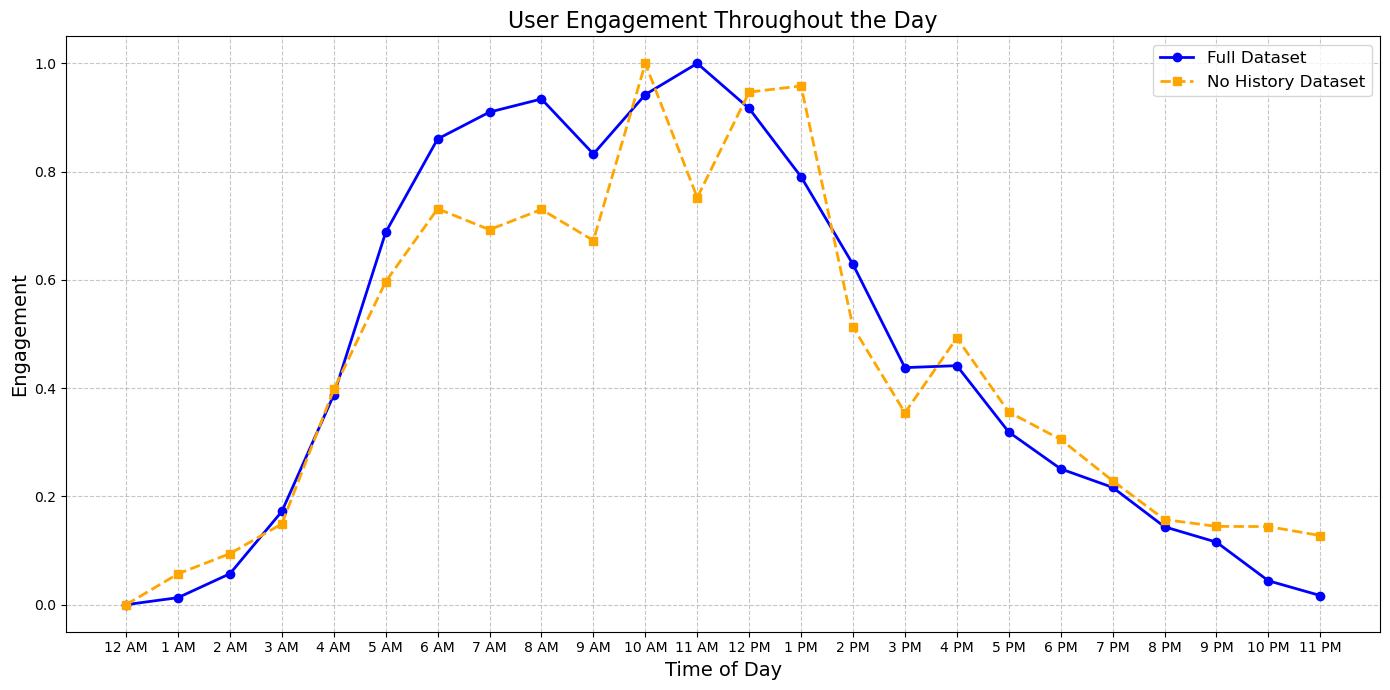

In [10]:
import matplotlib.pyplot as plt

# Define a min-max scaler function for standardization
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# For merged_df
merged_df['Time'] = pd.to_datetime(merged_df['Time'])
merged_df['Hour'] = merged_df['Time'].dt.hour
hourly_engagement_df = merged_df.groupby('Hour').size()
hourly_engagement_df_scaled = min_max_scale(hourly_engagement_df)

# For merged_null_df
merged_null_df['Time'] = pd.to_datetime(merged_null_df['Time'])
merged_null_df['Hour'] = merged_null_df['Time'].dt.hour
hourly_engagement_null_df = merged_null_df.groupby('Hour').size()
hourly_engagement_null_df_scaled = min_max_scale(hourly_engagement_null_df)

# convert hour integers to time labels
def hour_to_label(hour):
    return f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}"

# Generate time labels for the x-axis
time_labels = [hour_to_label(hour) for hour in range(24)]


plt.figure(figsize=(14, 7))
hourly_engagement_df_scaled.plot(
    kind='line', marker='o', linestyle='-', color='blue', label='Full Dataset', linewidth=2
)
hourly_engagement_null_df_scaled.plot(
    kind='line', marker='s', linestyle='--', color='orange', label='No History Dataset', linewidth=2
)

plt.xticks(ticks=range(24), labels=time_labels, rotation=0)

plt.title('User Engagement Throughout the Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Engagement', fontsize=14)  

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

The data shows that user engagement for both datasets peaks during the late morning and midday hours, with the highest interaction around 11 AM. Engagement begins to rise early in the morning, starting around 4 AM, and gradually increases until it peaks. After midday, there is a steady decline in engagement, with the lowest activity occurring late at night between 11 PM and 2 AM. While the overall trend is similar for both datasets, engagement levels in merged_null_df are slightly lower than in merged_df, especially during peak hours. This suggests that users are most active during typical daytime hours, reflecting common daily routines, and engagement tapers off as the day progresses into the evening.

# **Low History Threshold**

## Calculate the unique history counts (number of unique News_IDs) per User ID 

In [13]:
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'History_Count']

## Create a histogram of History_Count

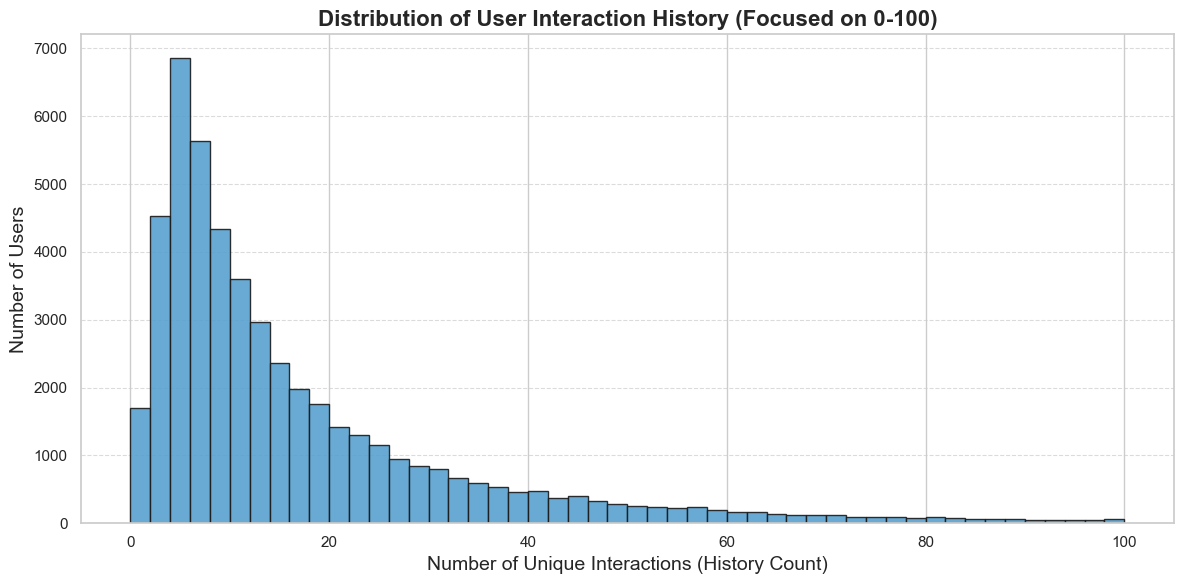

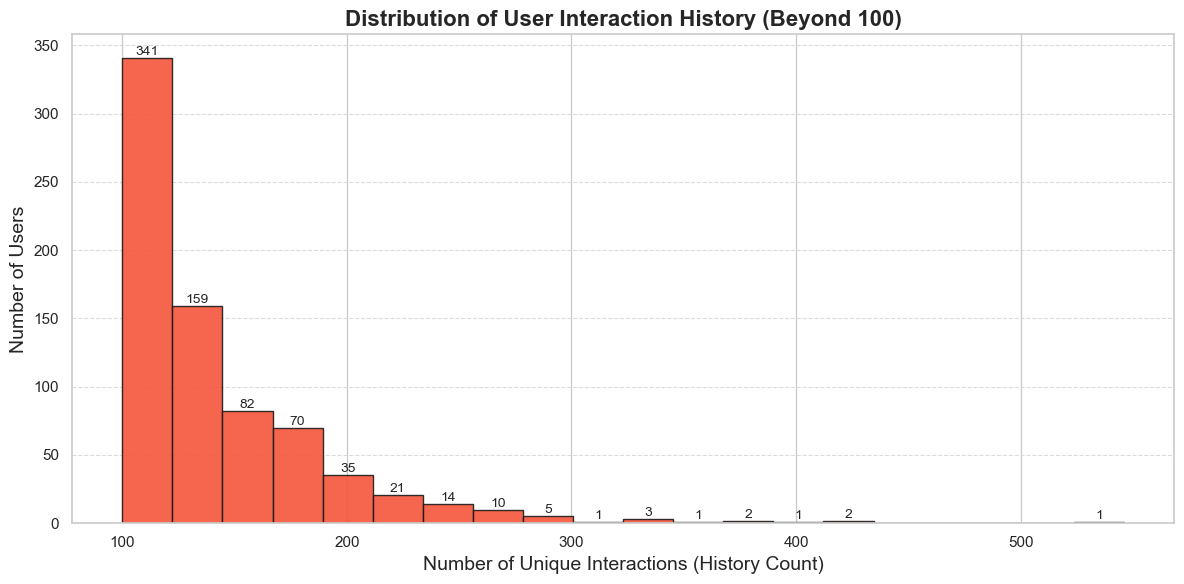

In [ ]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
counts, bins, bars = plt.hist(
    user_history_counts['History_Count'], 
    bins=50,
    range=(0, 100),  # we decided to focus on bins 0-100 since they were the most significant
    edgecolor='k', 
    color=sns.color_palette("Blues", 8)[4], 
    alpha=0.9
)


plt.title("Distribution of User Interaction History (Focused on 0-100)", fontsize=16, weight='bold')
plt.xlabel("Number of Unique Interactions (History Count)", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
counts, bins, bars = plt.hist(
    user_history_counts['History_Count'], 
    bins=20,  
    range=(100, user_history_counts['History_Count'].max()),  # Looked at bins beyond 100 interactions
    edgecolor='k', 
    color=sns.color_palette("Reds", 8)[4], 
    alpha=0.9
)
plt.title("Distribution of User Interaction History (Beyond 100)", fontsize=16, weight='bold')
plt.xlabel("Number of Unique Interactions (History Count)", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)

for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:  
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.8)
plt.tight_layout()
plt.show()

## Click-Thru Rate(CTR) for each type of user

In [17]:
# Function to count clicked items (-1)
def count_clicks(impressions):
    return sum(1 for item in impressions.split() if item.endswith('-1'))

# Function to count total impressions
def count_total_impressions(impressions):
    return len(impressions.split())

merged_df['Click'] = merged_df['Impressions'].apply(count_clicks)
merged_df['Total_Impressions'] = merged_df['Impressions'].apply(count_total_impressions)
user_ctr = merged_df.groupby('User ID').apply(
    lambda x: x['Click'].sum() / x['Total_Impressions'].sum() if x['Total_Impressions'].sum() > 0 else 0
).reset_index()
user_ctr.columns = ['User_ID', 'CTR']


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_2845/1745521784.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_ctr = merged_df.groupby('User ID').apply(


## Scatter plot of History Count vs. CTR

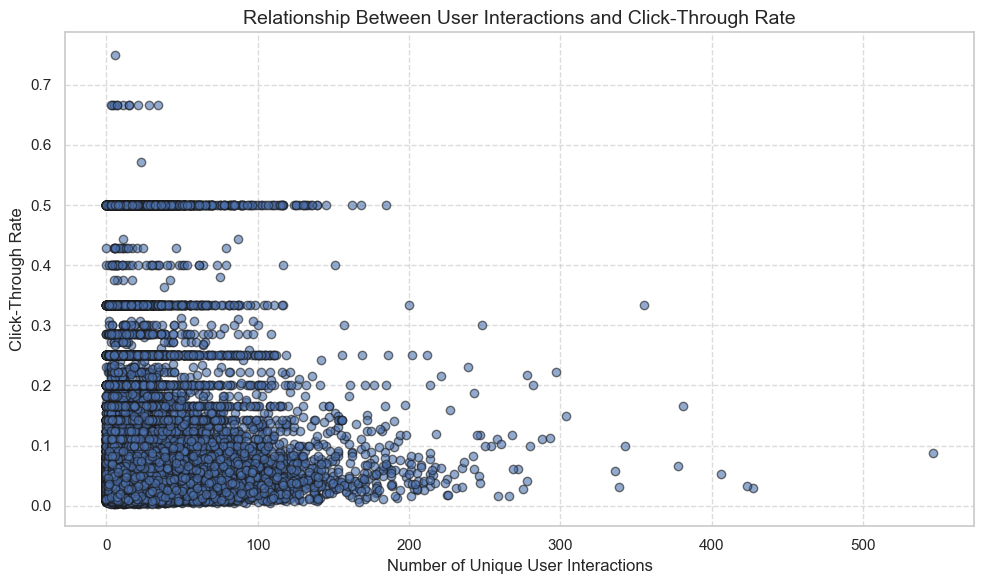

In [18]:
user_data = pd.merge(user_history_counts, user_ctr, on='User_ID')

plt.figure(figsize=(10, 6))
plt.scatter(user_data['History_Count'], user_data['CTR'], alpha=0.6, edgecolors='k')
plt.title("Relationship Between User Interactions and Click-Through Rate", fontsize=14)  
plt.xlabel("Number of Unique User Interactions", fontsize=12)  
plt.ylabel("Click-Through Rate", fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

## History & Impression Counts

In [19]:
# Calculate Total History Counts (unique News_IDs) per User
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'Total_History_Count']

# Calculate Total Impression Counts per User
user_impressions = merged_df.groupby('User ID')['Impressions'].apply(lambda x: sum(len(i.split()) for i in x)).reset_index()
user_impressions.columns = ['User_ID', 'Total_Impression_Count']

## Heatmap of hisotry and impressions

/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_2845/2773342066.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()


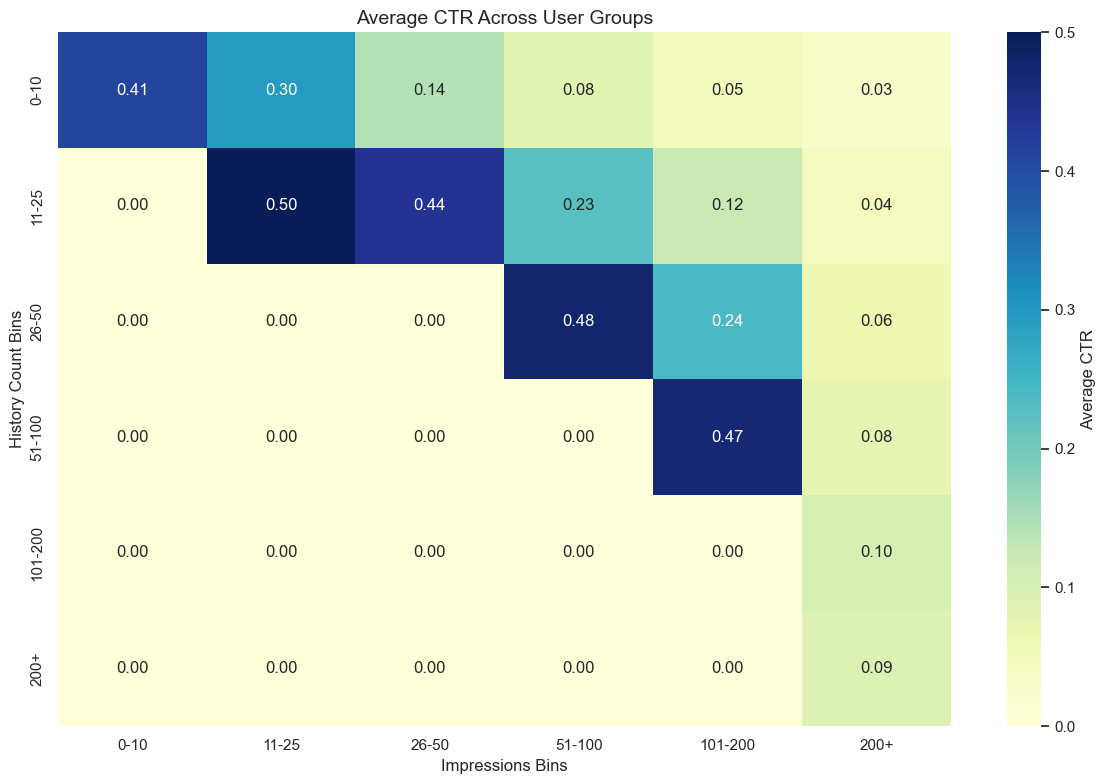

In [ ]:
history_bins = [0, 10, 25, 50, 100, 200, user_history_counts['Total_History_Count'].max()]
history_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '200+']
user_history_counts['History_Bin'] = pd.cut(user_history_counts['Total_History_Count'], bins=history_bins, labels=history_labels, include_lowest=True)

impression_bins = [0, 10, 25, 50, 100, 200, user_impressions['Total_Impression_Count'].max()]
impression_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '200+']
user_impressions['Impressions_Bin'] = pd.cut(user_impressions['Total_Impression_Count'], bins=impression_bins, labels=impression_labels, include_lowest=True)


user_data = pd.merge(user_history_counts, user_impressions, on='User_ID')
user_data = pd.merge(user_data, user_ctr, on='User_ID')
heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()
heatmap_data = heatmap_data.fillna(0) 


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average CTR'})
plt.title("Average CTR Across User Groups", fontsize=14)  
plt.xlabel("Impressions Bins", fontsize=12)
plt.ylabel("History Count Bins", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()

# **Sentiment Analysis no history user**

## **Title sentiment analysis**

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(title):
    score = analyzer.polarity_scores(title)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#predicted sentiment
merged_null_df['Title_Sentiment'] = merged_null_df['Title_y'].apply(get_sentiment)
merged_null_df['Impressions'] = pd.to_numeric(merged_null_df['Impressions'], errors='coerce')



**Calculate CTR for each sentiment**

In [24]:
# Calculate CTR for each sentiment category
ctr_by_sentiment = merged_null_df.groupby('Title_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_sentiment.columns = ['Title_Sentiments', 'CTR']

print(ctr_by_sentiment)

  Title_Sentiments      CTR
0         Negative  0.05094
1          Neutral  0.03506
2         Positive  0.03290


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_2845/3990966361.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ctr_by_sentiment = merged_null_df.groupby('Title_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()


**Visualize sentiment distribution throughout News Categories**

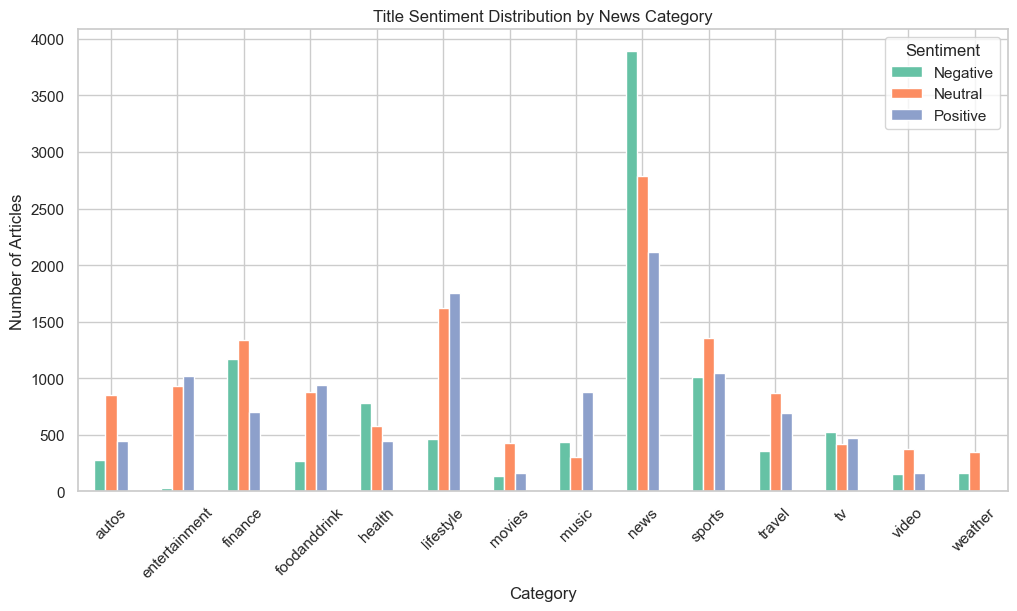

In [ ]:
category_sentiment_counts = merged_null_df.groupby(['Category_y', 'Title_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Sentiment-Based Word Clouds**

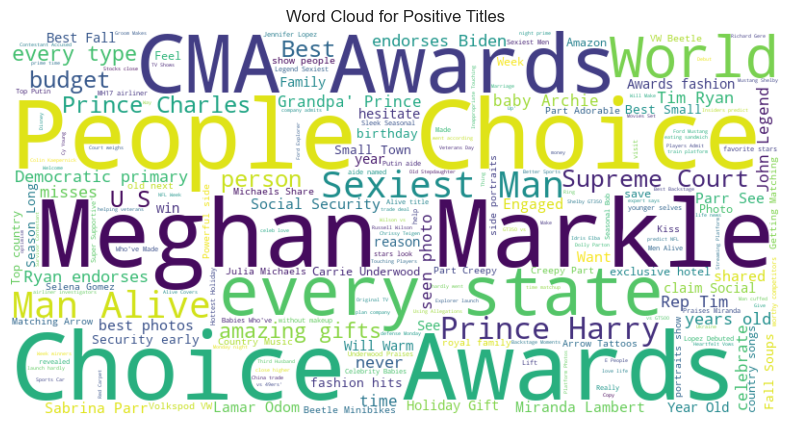

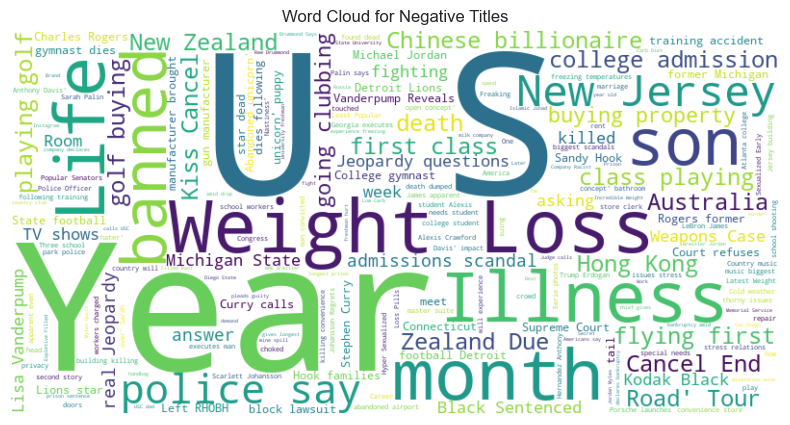

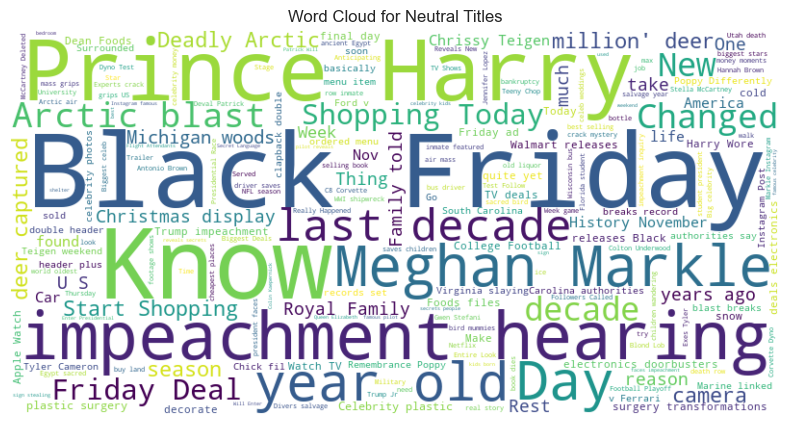

In [27]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_df[merged_null_df['Title_Sentiment'] == sentiment]['Title_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Titles')
    plt.show()


## **Abstract sentiment analysis**

In [28]:
merged_null_abstract = merged_null_df.dropna()

In [29]:
#sentiment function 
def get_sentiment(text):
    score = analyzer.polarity_scores(text) 
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_null_abstract['Abstract_Sentiment'] = merged_null_abstract['Abstract_y'].apply(get_sentiment)


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_2845/659177369.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_null_abstract['Abstract_Sentiment'] = merged_null_abstract['Abstract_y'].apply(get_sentiment)


**Calculate CTR for each sentiment**

In [30]:
ctr_by_sentiment2 = merged_null_abstract.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_sentiment2.columns = ['Abstract_Sentiment', 'CTR']

print(ctr_by_sentiment2)

  Abstract_Sentiment       CTR
0           Negative  0.050546
1            Neutral  0.037490
2           Positive  0.031539


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_2845/886169107.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ctr_by_sentiment2 = merged_null_abstract.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()


**Visualize sentiment distribution throughout News Categories**

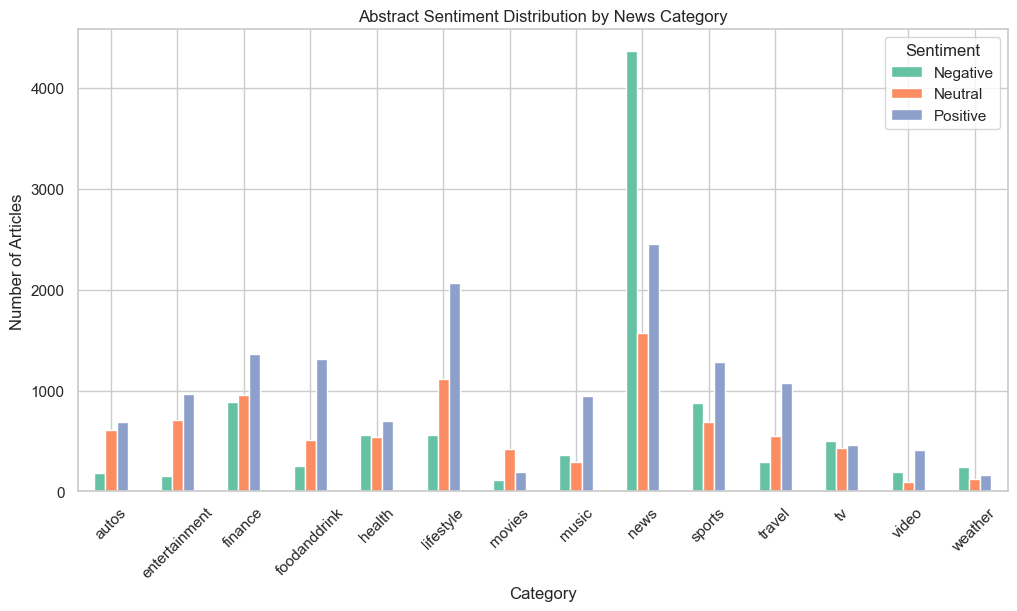

In [31]:
category_sentiment_counts = merged_null_abstract.groupby(['Category_y', 'Abstract_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Abstract Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Sentiment-Based Word Clouds**

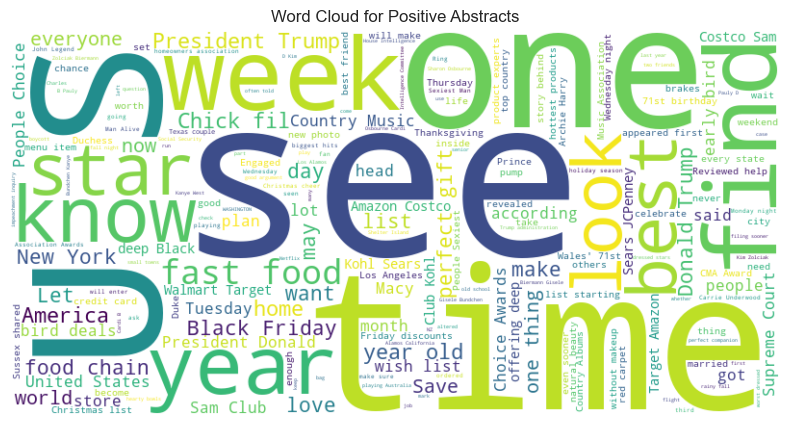

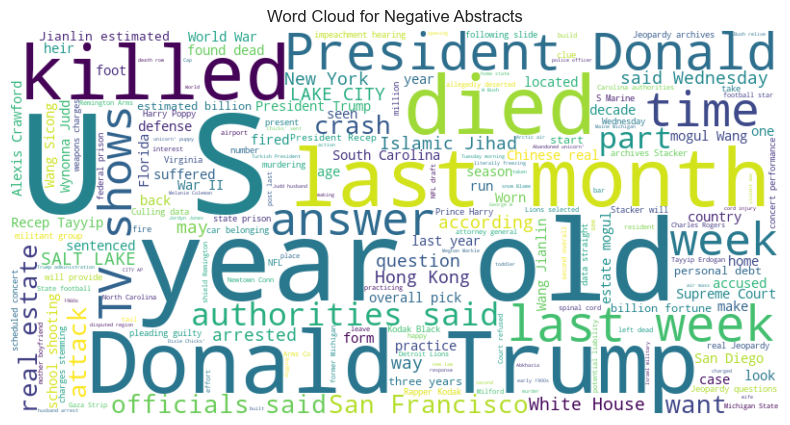

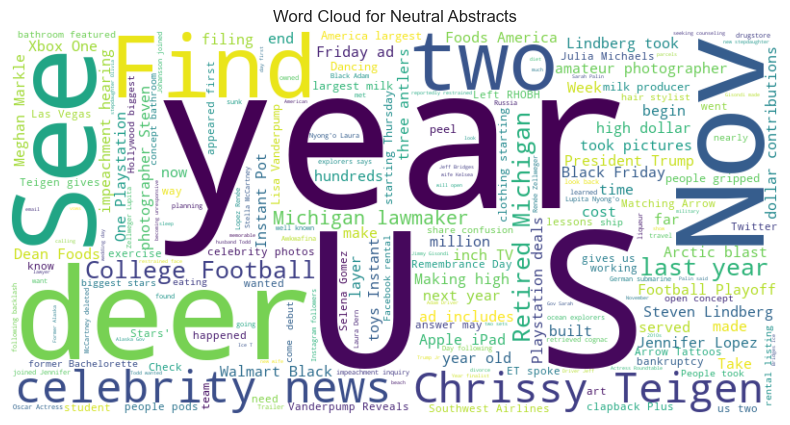

In [32]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_abstract[merged_null_abstract['Abstract_Sentiment'] == sentiment]['Abstract_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Abstracts')
    plt.show()


# **Sentiment Analysis all users(interactions & history)**

## **Title sentiment analysis**

In [ ]:
# exploding impression instead of history for consistency 
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)

behaviors_df['Impressions'] = behaviors_df['Impressions'].str.split(' ')
behaviors_df = behaviors_df.explode('Impressions').rename(columns={'Impressions': 'News_ID'})
behaviors_df[['News_ID', 'News_Subcategory']] = behaviors_df['News_ID'].str.split('-', n=1, expand=True)
behaviors_df['News_ID'] = behaviors_df['News_ID'].astype(str)


news_column_names = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t', names=news_column_names)
news_df['News_ID'] = news_df['News_ID'].astype(str)

merged_impression_df = behaviors_df.merge(news_df, on='News_ID', how='left')

In [3]:
merged_impression_df.head(5)

Impression ID User ID                   Time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              1  U13740  11/11/2019 9:05:58 AM   
2              2  U91836  11/12/2019 6:11:30 PM   
3              2  U91836  11/12/2019 6:11:30 PM   
4              2  U91836  11/12/2019 6:11:30 PM   

                                             History News_ID News_Subcategory  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...  N55689                1   
1  N55189 N42782 N34694 N45794 N18445 N63302 N104...  N35729                0   
2  N31739 N6072 N63045 N23979 N35656 N43353 N8129...  N20678                0   
3  N31739 N6072 N63045 N23979 N35656 N43353 N8129...  N39317                0   
4  N31739 N6072 N63045 N23979 N35656 N43353 N8129...  N58114                0   

  Category   SubCategory                                              Title  \
0   sports  football_nfl  Charles Rogers, former Michigan State football...   
1     news        newsus  Porsche launches into second story of New Jers...   
2   sports   more_sports  Bode Miller delivered his twin boys after midw...   
3     news  newspolitics  Senior Trump official embellished résumé, had ...   
4    autos     autosnews  2020 Ford Explorer launch hardly went accordin...   

                                            Abstract  \
0  Charles Rogers, the former Michigan State foot...   
1  The Porsche went airborne off a median in Toms...   
2  Bode Miller added yet another impressive title...   
3  State Dept. official Mina Chang claimed to be ...   
4                                                NaN   

                                             URL  \
0  https://assets.msn.com/labs/mind/BBWAPO6.html   
1  https://assets.msn.com/labs/mind/BBWyjM9.html   
2  https://assets.msn.com/labs/mind/BBWERWB.html   
3  https://assets.msn.com/labs/mind/BBWEmIj.html   
4  https://assets.msn.com/labs/mind/BBWEGnz.html   

                                      Title Entities  \
0  [{"Label": "Charles Rogers (American football)...   
1  [{"Label": "Porsche", "Type": "O", "WikidataId...   
2  [{"Label": "Bode Miller", "Type": "P", "Wikida...   
3  [{"Label": "Donald Trump", "Type": "P", "Wikid...   
4  [{"Label": "Ford Explorer", "Type": "V", "Wiki...   

                                   Abstract Entities  
0  [{"Label": "2003 NFL Draft", "Type": "U", "Wik...  
1  [{"Label": "Porsche", "Type": "O", "WikidataId...  
2  [{"Label": "Bode Miller", "Type": "P", "Wikida...  
3  [{"Label": "Harvard Business School", "Type": ...  
4                                                 []

In [5]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(title):
    score = analyzer.polarity_scores(title)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#predicted sentiment
merged_impression_df['Title'] = merged_impression_df['Title'].fillna('').astype(str)
merged_impression_df['Title_Sentiment'] = merged_impression_df['Title'].apply(get_sentiment)
merged_impression_df['News_Subcategory'] = pd.to_numeric(merged_impression_df['News_Subcategory'], errors='coerce')

**Calculate CTR for each sentiment**

In [7]:
ctr_by_sentiment2 = merged_impression_df.groupby('Title_Sentiment').apply(lambda x: x['News_Subcategory'].sum() / len(x)).reset_index()
ctr_by_sentiment2.columns = ['Title_Sentiment', 'CTR']

print(ctr_by_sentiment2)

  Title_Sentiment       CTR
0        Negative  0.053747
1         Neutral  0.036846
2        Positive  0.032796


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_1899/2096779189.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ctr_by_sentiment2 = merged_impression_df.groupby('Title_Sentiment').apply(lambda x: x['News_Subcategory'].sum() / len(x)).reset_index()


**Visualize sentiment distribution throughout News Categories**

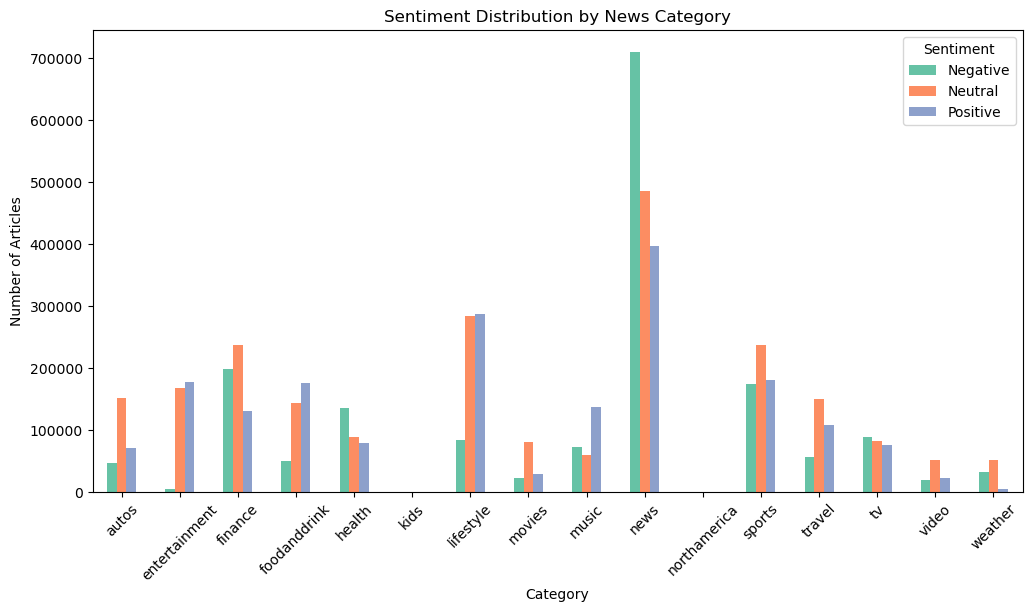

In [8]:
category_sentiment_counts = merged_impression_df.groupby(['Category', 'Title_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Sentiment-Based Word Clouds**

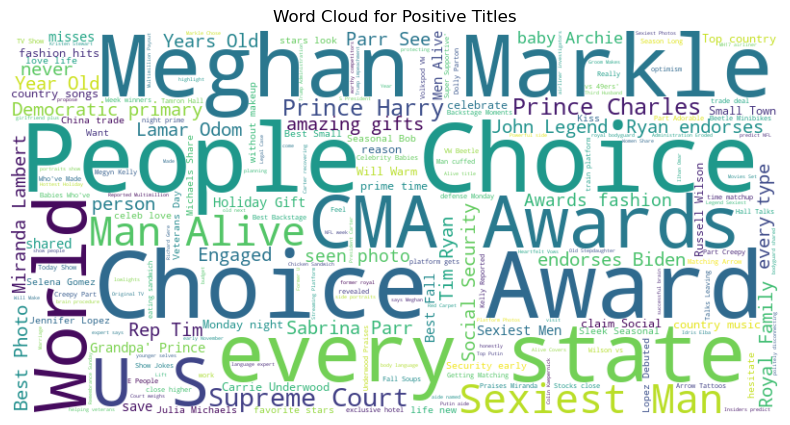

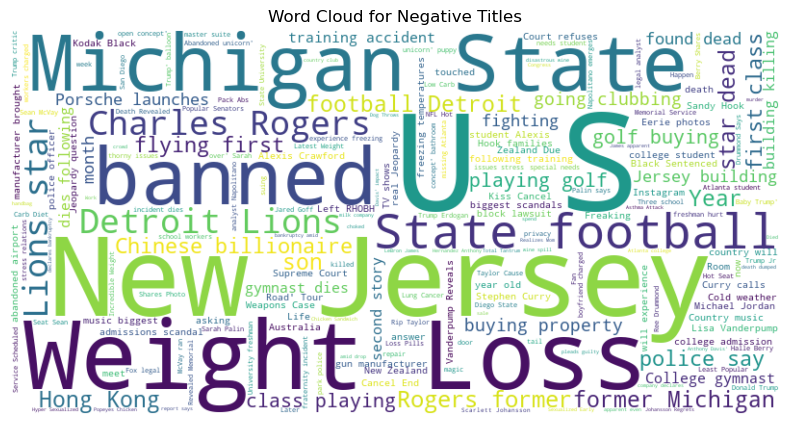

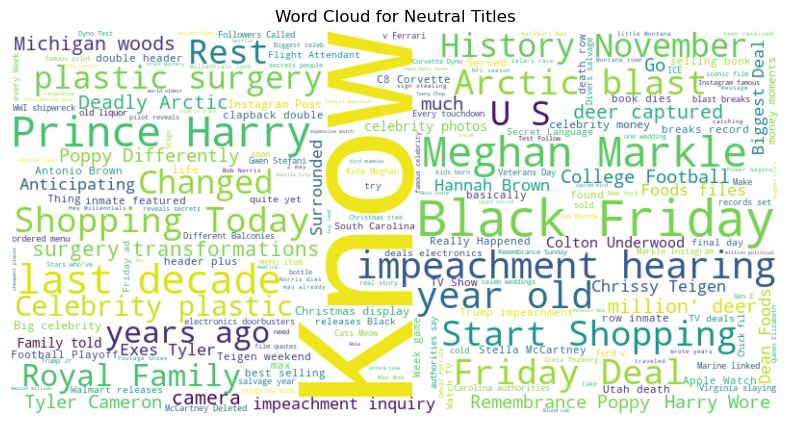

In [10]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_impression_df[merged_impression_df['Title_Sentiment'] == sentiment]['Title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Titles')
    plt.show()


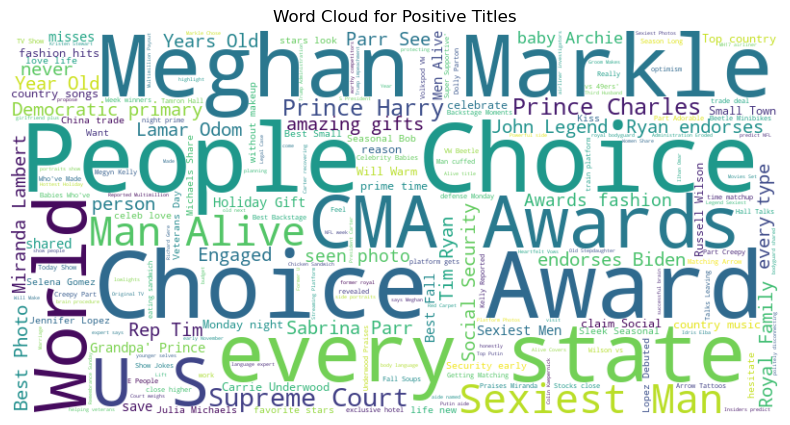

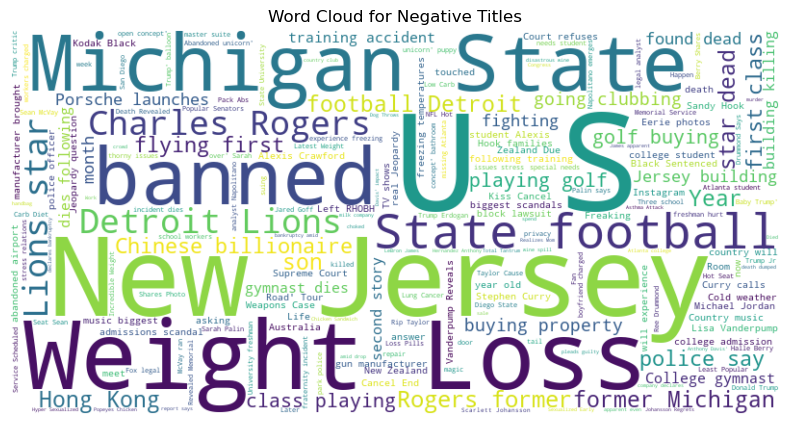

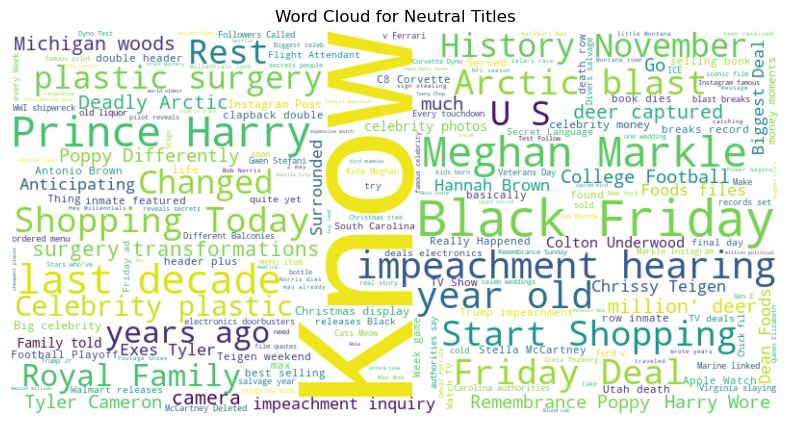

In [ ]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_impression_df[merged_impression_df['Title_Sentiment'] == sentiment]['Title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Titles')
    plt.show()


## **Abstract sentiment analysis**

In [11]:
merged_impression_abstract = merged_impression_df.dropna()

In [ ]:
#sentiment function 
def get_sentiment(text):
    score = analyzer.polarity_scores(text) 
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_impression_abstract['Abstract_Sentiment'] = merged_impression_abstract['Abstract'].apply(get_sentiment)

**Calculate CTR for each sentiment**

In [ ]:
ctr_by_sentiment2 = merged_impression_abstract.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_sentiment2.columns = ['Abstract_Sentiment', 'CTR']

print(ctr_by_sentiment2)

**Visualize sentiment distribution throughout News Categories**

In [ ]:
category_sentiment_counts = merged_null_abstract.groupby(['Category', 'Abstract_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Abstract Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Sentiment-Based Word Clouds**

In [ ]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_impression_abstract[merged_impression_abstract['Abstract_Sentiment'] == sentiment]['Abstract'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Abstracts')
    plt.show()

# **OTHER WORK: Political analysis**

In [ ]:

political_keywords = ["Democrat", "Republican", "Conservative", "Liberal", "Green","Constitution","American Solidarity"]

def find_political_keyword(entities):
    for keyword in political_keywords:
        if keyword.lower() in str(entities).lower():
            return keyword 
    return "Non-Political"  

merged_null_df["Political Group Title"] = merged_null_df["Title Entities_y"].apply(find_political_keyword)
merged_null_df["Political Group Abstract"] = merged_null_df["Abstract Entities_y"].apply(find_political_keyword)

In [ ]:
overall_counts = merged_null_df['Political Group Abstract'].value_counts()

political_counts = overall_counts[overall_counts.index != 'Non-Political']
non_political_count = overall_counts.get('Non-Political', 0)

data = {
    'Non-Political': non_political_count,
    'Political': political_counts.sum() 
}
labels = list(data.keys())
sizes = list(data.values())


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Political and Non-Political Recommendations (Title)')

plt.figure(figsize=(8, 6))
plt.pie(political_counts, labels=political_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Political Recommendations (Title)')
plt.show()

***News did not show political bias***